In [1]:
import os
from __future__ import print_function, absolute_import
import elastix
import matplotlib.pyplot as plt
import numpy as np
import imageio
import SimpleITK as sitk

ELASTIX_PATH = os.path.join('C:/Users/20181742/OneDrive - TU Eindhoven/master/jaar 2/Q3/myfolder/elastix.exe')
TRANSFORMIX_PATH = os.path.join('C:/Users/20181742/OneDrive - TU Eindhoven/master/jaar 2/Q3/myfolder/transformix.exe')
if not os.path.exists(ELASTIX_PATH):
    raise IOError('Elastix cannot be found, please set the correct ELASTIX_PATH.')
if os.path.exists('results') is False:
    os.mkdir('results')
el = elastix.ElastixInterface(elastix_path=ELASTIX_PATH)

def DICE_COE(mask1, mask2):
    intersect = np.sum(mask1*mask2)
    fsum = np.sum(mask1)
    ssum = np.sum(mask2)
    dice = (2 * intersect ) / (fsum + ssum)
    dice = np.mean(dice)
    dice = round(dice, 3) # for easy reading
    return dice 

# Define paths

In [2]:
i=115
x=116
l='9'
m='f'
if os.path.exists('C:/Users/20181742/OneDrive - TU Eindhoven/master/jaar 2/Q3/CS/project/results/{}'.format(l)) is False:
    os.mkdir('C:/Users/20181742/OneDrive - TU Eindhoven/master/jaar 2/Q3/CS/project/results/{}/'.format(l))
if os.path.exists('C:/Users/20181742/OneDrive - TU Eindhoven/master/jaar 2/Q3/CS/project/results/{}/{}'.format(l,m)) is False:
    os.mkdir('C:/Users/20181742/OneDrive - TU Eindhoven/master/jaar 2/Q3/CS/project/results/{}/{}'.format(l,m))
if os.path.exists('C:/Users/20181742/OneDrive - TU Eindhoven/master/jaar 2/Q3/CS/project/results/{}/{}/{}-{}'.format(l,m,i,x)) is False:
    os.mkdir('C:/Users/20181742/OneDrive - TU Eindhoven/master/jaar 2/Q3/CS/project/results/{}/{}/{}-{}'.format(l,m,i,x))
fixed_image_path = 'C:/Users/20181742/OneDrive - TU Eindhoven/master/jaar 2/Q3/CS/project/TrainingData/p{}/mr_bffe.mhd'.format(i)
fixed_image_path_new = 'C:/Users/20181742/OneDrive - TU Eindhoven/master/jaar 2/Q3/CS/project/TrainingData/p{}/prostaat.mhd'.format(i)
moving_image_path = 'C:/Users/20181742/OneDrive - TU Eindhoven/master/jaar 2/Q3/CS/project/TrainingData/p{}/mr_bffe.mhd'.format(x)
moving_image_path_new = 'C:/Users/20181742/OneDrive - TU Eindhoven/master/jaar 2/Q3/CS/project/TrainingData/p{}/prostaat.mhd'.format(x)
parameter_file_path_affine = 'C:/Users/20181742/OneDrive - TU Eindhoven/master/jaar 2/Q3/CS/project/TrainingData/parameters_affine.txt'
results_folder='C:/Users/20181742/OneDrive - TU Eindhoven/master/jaar 2/Q3/CS/project/results/{}/{}/{}-{}'.format(l,m,i,x)
mr_transformation_path=results_folder+'/mr_transformed.png'
resolution_path=results_folder+'/resolution.png'
prostate_transformed_path=results_folder+'/prostate_transformed.png'

# Registration

In [3]:
%%time
el.register(
    fixed_image=fixed_image_path,
    moving_image=moving_image_path,
    parameters=[parameter_file_path_affine],
    output_dir=results_folder)

C:/Users/20181742/OneDrive - TU Eindhoven/master/jaar 2/Q3/myfolder/elastix.exe -f C:/Users/20181742/OneDrive - TU Eindhoven/master/jaar 2/Q3/CS/project/TrainingData/p115/mr_bffe.mhd -m C:/Users/20181742/OneDrive - TU Eindhoven/master/jaar 2/Q3/CS/project/TrainingData/p116/mr_bffe.mhd -p C:/Users/20181742/OneDrive - TU Eindhoven/master/jaar 2/Q3/CS/project/TrainingData/parameters_affine.txt -out C:/Users/20181742/OneDrive - TU Eindhoven/master/jaar 2/Q3/CS/project/results/9/f/115-116
Wall time: 3.93 s


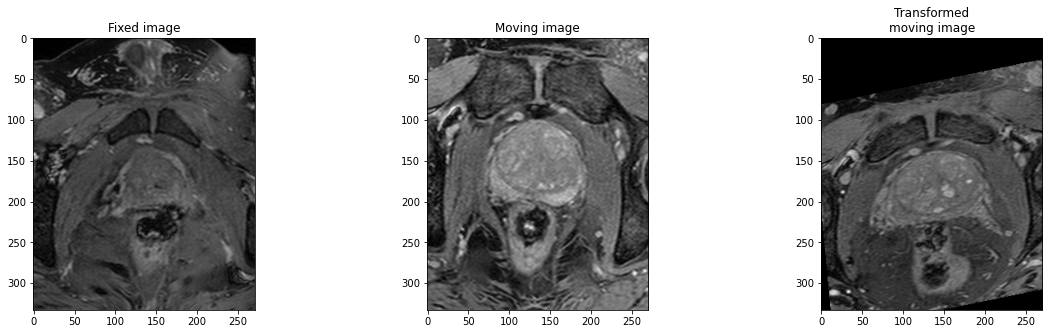

In [4]:
result_path_affine = results_folder+'/result.0.mhd'
fixed_image = imageio.imread(fixed_image_path)[40,:,:]
moving_image = imageio.imread(moving_image_path)[40,:,:]
transformed_moving_image = imageio.imread(result_path_affine)[40,:,:]
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
ax[0].imshow(fixed_image, cmap='gray')
ax[0].set_title('Fixed image')
ax[1].imshow(moving_image, cmap='gray')
ax[1].set_title('Moving image')
ax[2].imshow(transformed_moving_image, cmap='gray')
ax[2].set_title('Transformed\nmoving image')

plt.show()
fig.savefig(mr_transformation_path)

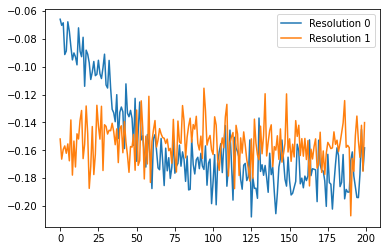

In [5]:
for i in range(2):
    log_path=results_folder+'\IterationInfo.0.R{}.txt'.format(i)
    log = elastix.logfile(log_path)
    # Plot the 'metric' against the iteration number 'itnr'
    plt.plot(log['itnr'], log['metric'])
plt.legend(['Resolution {}'.format(i) for i in range(3)])
plt.savefig(resolution_path)

# Transformation

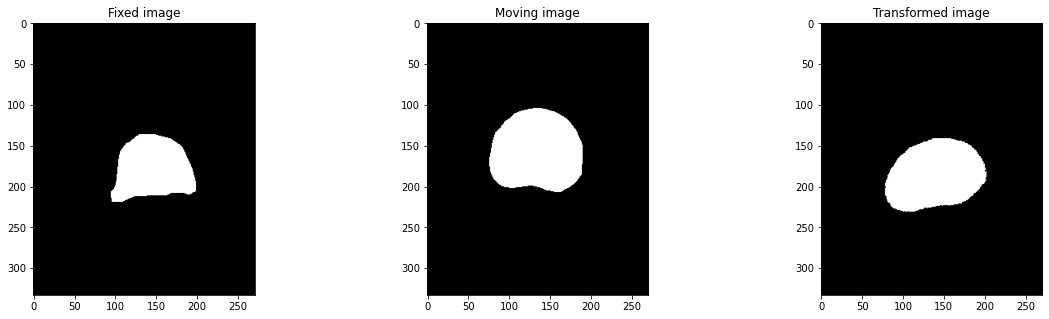

0.612


In [6]:
path_transform=results_folder+'/TransformParameters.0.txt'
f = open(path_transform,'r')
filedata = f.read()
f.close()

newdata = filedata.replace("(FinalBSplineInterpolationOrder 3)","(FinalBSplineInterpolationOrder 0)")

f = open(path_transform,'w')
f.write(newdata)
f.close()
# Make a new transformix object tr with the CORRECT PATH to transformix
tr_affine =elastix.TransformixInterface(parameters=path_transform,
transformix_path=TRANSFORMIX_PATH)
transformed_image_path_affine = tr_affine.transform_image(moving_image_path_new, output_dir=results_folder)

fixed_image_new = imageio.imread(fixed_image_path_new)[40,:,:]
moving_image_new = imageio.imread(moving_image_path_new)[40,:,:]
transformed_moving_image_new= imageio.imread(transformed_image_path_affine.replace('dcm', 'tiff'))[40,:,:]
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
ax[0].imshow(fixed_image_new, cmap='gray')
ax[0].set_title('Fixed image')
ax[1].imshow(moving_image_new, cmap='gray')
ax[1].set_title('Moving image')
ax[2].imshow(transformed_moving_image_new, cmap='gray')
ax[2].set_title('Transformed image')
plt.show()
fig.savefig(prostate_transformed_path)
fixed_image_new = imageio.imread(fixed_image_path_new)
transformed_moving_image_new= imageio.imread(transformed_image_path_affine.replace('dcm', 'tiff'))
dice_score=DICE_COE(fixed_image_new, transformed_moving_image_new)
print(dice_score)